<a href="https://colab.research.google.com/github/yudhiesh1997/RedWineQuality/blob/master/NLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn 
import seaborn as sns 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("/content/drive/My Drive/winequality-red 3.csv")

columns_ = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'quality']
features = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']

In [4]:
df = df[columns_]

In [5]:
df.head()

,alcohol,volatile acidity,sulphates,citric acid,quality
0,9.4,0.70,0.56,0.00,5
1,9.8,0.88,0.68,0.00,5
2,9.8,0.76,0.65,0.04,5
3,9.8,0.28,0.58,0.56,6
4,9.4,0.70,0.56,0.00,5


In [7]:
scaler = StandardScaler()

def scale_features(features, df):
  df[features] = scaler.fit_transform(df[features])

In [8]:
scale_features(features=features, df=df)

In [9]:
df.head()

,alcohol,volatile acidity,sulphates,citric acid,quality
0,-0.960246,0.961877,-0.579207,-1.391472,5
1,-0.584777,1.967442,0.128950,-1.391472,5
2,-0.584777,1.297065,-0.048089,-1.186070,5
3,-0.584777,-1.384443,-0.461180,1.484154,6
4,-0.960246,0.961877,-0.579207,-1.391472,5


1) Choose hyperparameters

2) Divide the WHOLE train data into K-folds.

3) Use the train portion of each fold for training with parameters from (1), validate on the validation portion of each fold. This gives an idea about the model performance on unseen data. Do the same thing K times on the remainder of folds

4) Average the results obtained from K validations, which should give you even better idea about the generalization properties of a particular model (basically, of particular hyperparameters) on unseen data.

In [10]:
from sklearn.model_selection import StratifiedKFold, train_test_split

# Stratified K-fold cross-validation 
df['kfold'] = -1
df = df.sample(frac=1).reset_index(drop=True)
y = df.quality
kf = StratifiedKFold(n_splits=5)

for f, (t_,v_) in enumerate(kf.split(X=df, y=y)):
  df.loc[v_, 'kfold'] = f
  df_train = df.loc[t_]
  df_test = df.loc[v_]

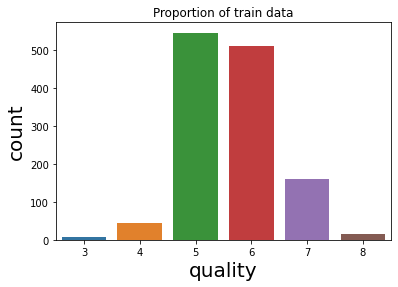

In [11]:
# Split data into k fold = 5
def plot_distribution(df, title):
  b = sns.countplot(x='quality', data=df)
  b.set_xlabel('quality', fontsize=20)
  b.set_ylabel('count', fontsize=20)
  b.set_title(label = title)

plot_distribution(df=df_train, title = "Proportion of train data")


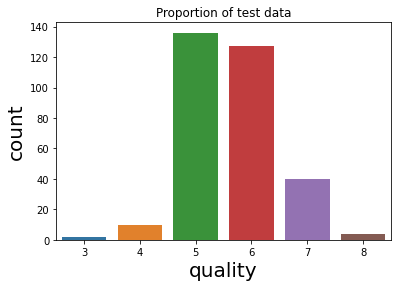

In [12]:
plot_distribution(df=df_test, title = "Proportion of test data")


In [13]:
df_train.head()

,alcohol,volatile acidity,sulphates,citric acid,quality,kfold
0,-0.397043,0.012176,-0.107102,-1.391472,6,0
1,-0.021574,-1.160984,-0.638220,0.200392,6,0
2,-0.960246,-0.043689,-0.815259,0.559845,5,0
3,-0.115441,-1.719632,1.250199,-0.159061,6,0
4,1.198701,1.855713,0.483029,-1.032019,6,0


In [14]:
X_train = df_train.drop("quality", axis = 1).values
X_test = df_test.drop("quality", axis = 1).values 
y_train = df_train["quality"].values 
y_test = df_test["quality"].values 

In [15]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [30]:
param_grid = { 
    'n_estimators': np.arange(100,1000,100),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
scoring = ['roc_auc_ovr', 'f1_weighted', 'accuracy']

In [31]:
rf = RandomForestClassifier()

gd_sr = GridSearchCV(estimator=rf,
                     param_grid=grid_param,
                     scoring=scoring,
                     cv=5,
                     refit='roc_auc_ovr',
                     n_jobs=-1)

In [32]:
gd_sr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

In [33]:
print('The best model is: ', gd_sr.best_params_)
print('This model produces a mean cross-validated score (roc) of', gd_sr.best_score_)

The best model is:  {'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 1400}
This model produces a mean cross-validated score (roc) of 0.8309881360725487


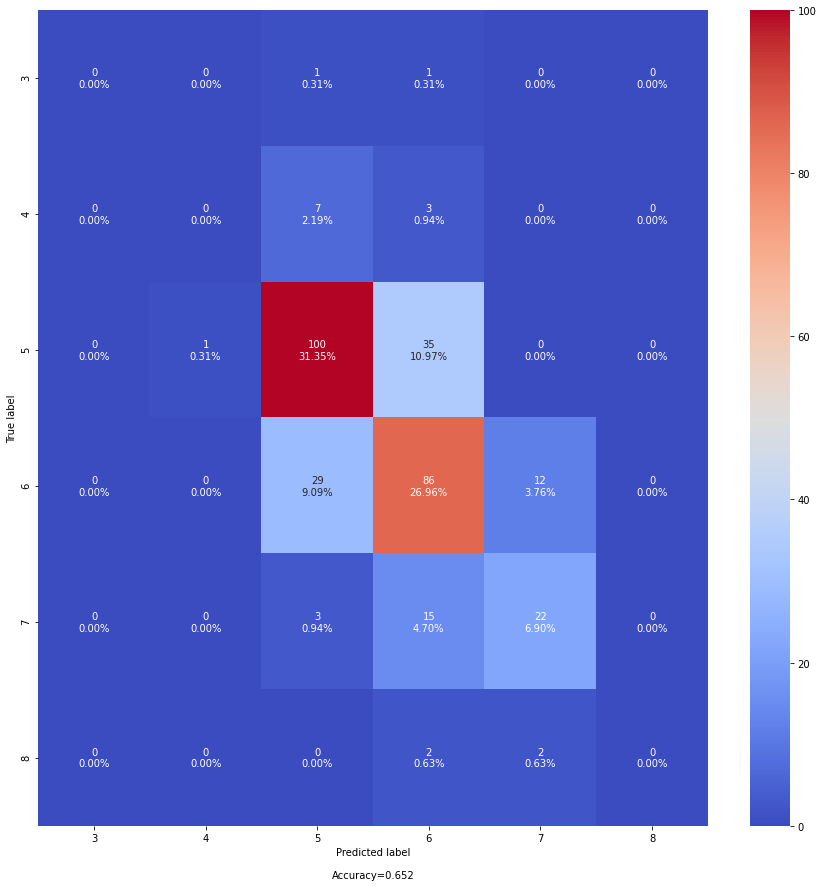

In [34]:
y_pred_rf = gd_sr.predict(X_test)
cm_gd = confusion_matrix(y_test, y_pred_rf)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['3', '4', '5', '6', '7', '8']
make_confusion_matrix(cm_gd, 
                      group_names=labels,
                      categories=categories, 
                      cmap='coolwarm',
                      figsize=(15,15))

In [36]:
tuned_parameters = {
    'max_features': [0.5,0.6,0.7,0.8,0.9,1.0], 
    'max_depth': [2,3,4,5,6,7],
    'min_samples_leaf':[1,10,100],
    'max_leaf_nodes': list(range(2, 100)), 
    'min_samples_split': [2, 3, 4],
    'random_state':[42]
    } 


clf_lr = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, cv=5, scoring=scoring , refit='roc_auc_ovr')
clf_lr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='de...
                         'max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                         

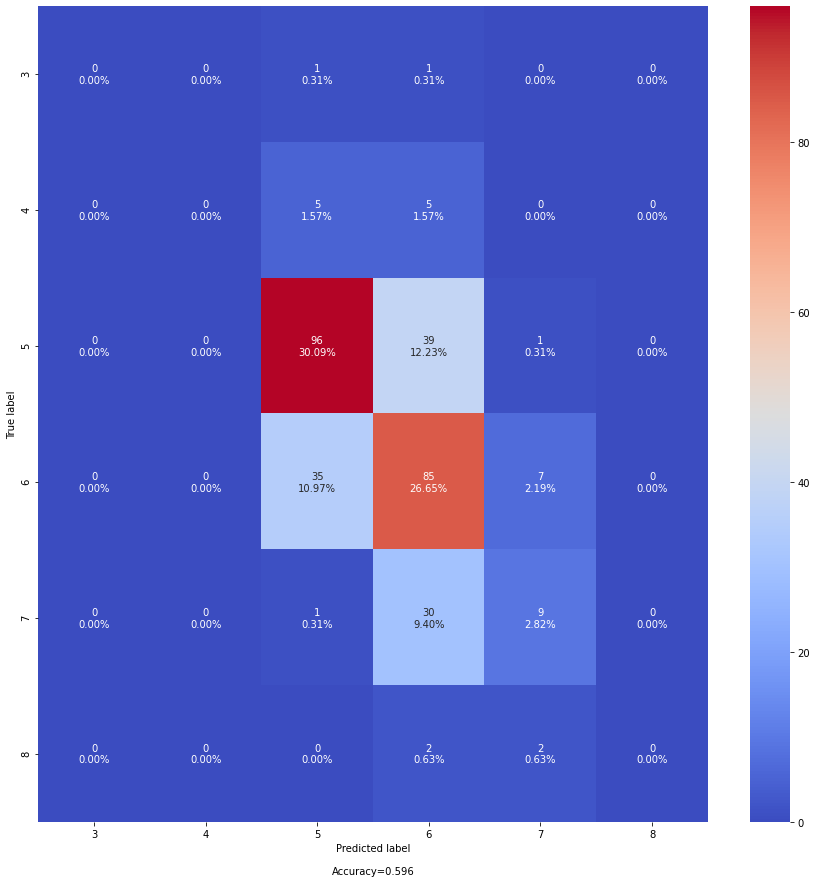

In [37]:
lr_pred = clf_lr.predict(X_test)
cm = confusion_matrix(y_test, lr_pred)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['3', '4', '5', '6', '7', '8']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='coolwarm',
                      figsize=(15,15))

In [38]:
print('The best model is: ', clf_lr.best_params_)
print('This model produces a mean cross-validated score (roc) of', clf_lr.best_score_)

The best model is:  {'max_depth': 4, 'max_features': 0.6, 'max_leaf_nodes': 16, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 42}
This model produces a mean cross-validated score (roc) of 0.7630003910358825
